In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

airDF = pd.read_csv(r'c:\pyml_scripts\air_data\air_data.csv', encoding = 'utf-8')
airDF.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [2]:
 airDF.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [3]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

In [4]:
len(airDF.index)

62988

In [5]:
airDF_T = airDF.describe(percentiles = [], include = 'all').T 
airDF_T

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988.0,NaN,NaN,NaN,31494.5,18183.213715,1.0,31494.5,62988.0
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988.0,NaN,NaN,NaN,4.102162,0.373856,4.0,4.0,6.0
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1185,广东,17507,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,41.0,110.0
LOAD_TIME,62988,1,2014/03/31,62988,NaN,NaN,NaN,NaN,NaN


In [6]:
# 計算每個欄位的空值數量
airDF_T['null'] = len(airDF) - airDF_T['count'] 
# 顯示空值、最小值、最大值
airDF_T[['null','min','max']] 

,null,min,max
MEMBER_NO,0.0,1.0,62988.0
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0.0,4.0,6.0
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420.0,6.0,110.0
LOAD_TIME,0,NaN,NaN


In [7]:
#缺失值處理：刪除票價為空值的資料
airDF_clean =  airDF[airDF['SUM_YR_1'].notnull() &  airDF['SUM_YR_2'].notnull()] 

#異常值處理1：刪除票價為0
index1 =  airDF_clean['SUM_YR_1'] != 0
index2 =  airDF_clean['SUM_YR_2'] != 0

#異常值處理2：若平均折扣不為0且總飛行里程大於0(表示客戶至少有付費)，但此時如果票價為0，則表示此筆資料為異常值
index3 = (airDF_clean['SEG_KM_SUM'] == 0) & (airDF_clean['avg_discount'] == 0)

airDF_clean =  airDF_clean[index1 | index2 | index3] 
airDF_clean = airDF_clean.reset_index(drop=True)
airDF_clean.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [8]:
len(airDF_clean.index)

62044

In [9]:
#根據航空業的商業模式，選擇下列6個欄位進行分析
airDF_Spec = airDF_clean[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
airDF_Spec.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


In [10]:
airDF1 = pd.DataFrame(columns=['L', 'R', 'F', 'M', 'C'])  
tmp = {
    'L':pd.to_datetime(airDF_Spec['LOAD_TIME']) - pd.to_datetime(airDF_Spec['FFP_DATE']),
    'R':airDF_Spec['LAST_TO_END'],
    'F':airDF_Spec['FLIGHT_COUNT'],
    'M':airDF_Spec['SEG_KM_SUM'],
    'C':airDF_Spec['avg_discount'],
    }
airDF1 = pd.DataFrame(data = tmp, columns = ['L', 'R', 'F', 'M', 'C'])  

import numpy as np
# 將timedelta64轉換為int32
airDF1['L'] = (airDF1['L'] / np.timedelta64(1, 'D')).astype(int)

airDF1.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [11]:
#聚類分析需要進行標準化(Standardization)
airDF_zscore = (airDF1 - airDF1.mean(axis=0)) / airDF1.std(axis=0)
airDF_zscore.head()

,L,R,F,M,C
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


In [12]:
#進行聚類分析
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters = 5)  #分成5類
kmeans5.fit(airDF_zscore)

print(kmeans5.cluster_centers_)
print(kmeans5.labels_)

[[ 0.4836574  -0.79940021  2.4831749   2.42445945  0.30923797]
 [ 1.16080771 -0.37738562 -0.0867216  -0.09464065 -0.15669093]
 [-0.31321639  1.68682327 -0.57391382 -0.5367476  -0.17484976]
 [ 0.04419532 -0.00260596 -0.23038203 -0.23484376  2.17554403]
 [-0.7003152  -0.41503601 -0.16081257 -0.16053471 -0.25728757]]
[0 0 0 ... 4 2 2]


In [13]:
kmeansCenters = pd.DataFrame(kmeans5.cluster_centers_, columns = airDF_zscore.columns)
labelsCounts = pd.DataFrame(kmeans5.labels_)[0].value_counts()
kmeansLabels = pd.DataFrame(labelsCounts, index = None)
kmeansLabels.columns = ['Num']
kmeansResult = pd.concat([kmeansCenters, kmeansLabels], axis=1)
kmeansResult['Class'] = [0,1,2,3,4]
kmeansResult = kmeansResult[['Class','Num', 'L', 'R', 'F', 'M', 'C']]
kmeansResult.head()

,Class,Num,L,R,F,M,C
0,0,5337,0.483657,-0.799400,2.483175,2.424459,0.309238
1,1,15735,1.160808,-0.377386,-0.086722,-0.094641,-0.156691
2,2,12117,-0.313216,1.686823,-0.573914,-0.536748,-0.174850
3,3,4225,0.044195,-0.002606,-0.230382,-0.234844,2.175544
4,4,24630,-0.700315,-0.415036,-0.160813,-0.160535,-0.257288


In [14]:
#將聚類標籤與airDF_clean合併
airDF_clean_labels = pd.DataFrame(kmeans5.labels_, columns= ['CLASS'])
airDF_result = pd.concat([airDF_clean, airDF_clean_labels],axis=1)
airDF_result.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight,CLASS
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50,0
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33,0
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26,0
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12,0
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39,0


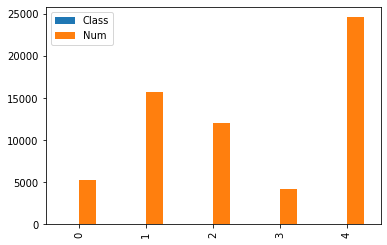

In [15]:
kmeansResult[['Class','Num']].plot(kind='bar')
plt.show()

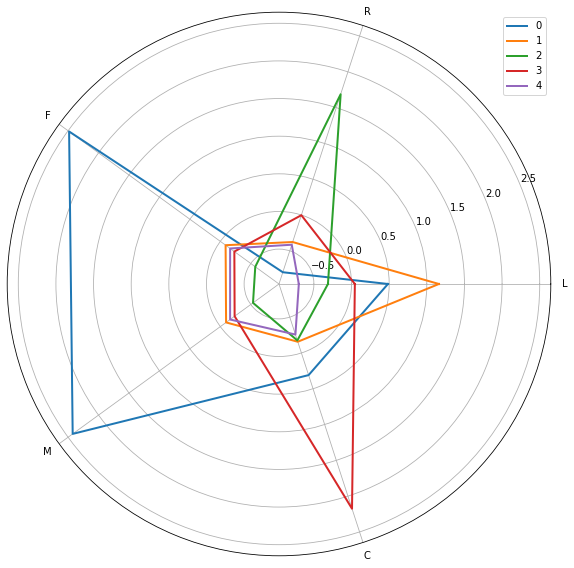

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,polar=True)



for i in range(5):
    data=kmeansResult[kmeansResult['Class']==i].drop(['Class','Num'],axis=1).values.reshape(-1,)
    data_label = ['L', 'R', 'F', 'M', 'C']
    theta = np.linspace(0,2*np.pi,len(data_label),endpoint=False)
    values = np.concatenate((data,[data[0]]))
    thetas = np.concatenate((theta,[theta[0]]))
    ax.set_thetagrids(theta*180/np.pi,data_label)
    ax.plot(thetas,values,linewidth=2,label=i)
    

#ax.set_thetagrids(thetas*180/np.pi,data_label[i])
plt.legend()
plt.show()

# 特徵說明
## L：加入會員的時間。越大代表會員資歷越久
## R：最近一次搭機時間。越大代表越久沒有搭機
## F：搭機次數。越大代表搭機次數越多
## M：飛行總里程。越大代表總里程越多
## C：平均折扣率。越大代表折扣越少，0代表免費機票，10代表沒有折扣

# 分析報告
### 類別0的C特徵值最大，F、M特徵值最小
### 類別1的L特徵值最大
### 類別2的M、F特徵值最大，R特徵值最小
### 類別3的R特徵值最大，M特徵值最小
### 類別4的L、C特徵值最小

|類別 | L          | R          | F          |M          |C          |
|----|-------|-------|-------|-------|-------|
|類別0| +          |+           |+           |+           |+++++  |
|類別1| +++       |+           |+           |+           |+++++  |
|類別2| ++        |+           |+++++    |+++++    |++       |
|類別3| +          |++++      |+           |+            |+         |
|類別4| +          |+           |+           |+           |+         |